In [22]:
import pandas as pd

In [23]:

df = pd.read_csv('our-bma.csv')


In [24]:
df


,Refs,Reads
0,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...,ACCATAACGCGTGGGGCGACCCCGGAATGCGGCTCTCTAGGCTCCT...
1,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...,TCGAAGCAGTAGGGCCTCCAAATAGGTTGTCCTCCGTTTTATCTAA...
2,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...,AGTTAACCTCCCACGGGCCGGGCCCCTTGGTTCCCCACCTGCAAGA...
3,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...,GCCCAAGGGACGCCCGCAGCGACGCAATTGCGGAGTAAGCGCGTGT...
4,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...,GCACGGATGTAACTCATGGTTCCTCCGTTCCGCCGAGCGCCTTTTG...
...,...,...
9995,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...,GCATGATTTGGAAGGTCGGCACTATACCCACCCGGGTATATGGTCC...
9996,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...,GAAGTTGGAACGTGTTCCTCCGCCAATAAGGTTGGCTTCTAGTATA...
9997,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...,TGCTTCCGGACAACCGCAAGGGTGCATGCGCGCCGCATTCCCAATT...
9998,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...,ACGGGCCGTCCTATGCTGGACATTGAATCCACAACAACGTCTTGCC...


In [25]:
from tqdm import tqdm


In [26]:
noisy_strands = [s.strip() for s in list(df['Reads'])]


In [27]:
ref_strands = [s.strip() for s in list(df['Refs'])]


In [28]:
import difflib


In [29]:
def print_diff(ref_strand, noisy_strand):
    global pairs
    global pairs_no_pos
    a, b = 0, 0

    # quadratic time, no heuristics
    for match in difflib.SequenceMatcher(None, ref_strand, noisy_strand, autojunk=False).get_matching_blocks():
        was = ref_strand[a:match.a]
        now = noisy_strand[b:match.b]
        
        a = match.a + match.size
        b = match.b + match.size
        
        if was == '' and now == '':
            pass
        else:
            # print('{}|{}'.format(was, now), end=', ')
            pairs += [(was, now, match.a)]
            pairs_no_pos += [(was, now)]


            
        
    #print('')


100%|██████████| 10000/10000 [00:00<00:00, 51967.20it/s]


[101, 357, 581, 794, 1076, 1272, 1492, 1720, 1879, 2062, 2239, 2383, 2560, 2680, 2894, 3003, 3164, 3307, 3453, 3524, 3643, 3740, 3881, 3965, 4017, 4105, 4207, 4261, 4334, 4432, 4517, 4562, 4610, 4682, 4734, 4833, 4850, 4883, 4975, 4954, 5025, 5101, 5072, 5092, 5264, 5245, 5252, 5218, 5263, 5380, 5406, 5493, 5338, 5485, 5583, 5477, 5480, 5383, 5443, 5438, 5385, 5320, 5347, 5299, 5293, 5153, 5211, 5131, 5128, 5109, 5001, 4923, 4942, 4854, 4837, 4778, 4727, 4667, 4572, 4450, 4450, 4369, 4302, 4171, 4162, 4055, 3893, 3870, 3760, 3561, 3429, 3325, 3233, 3161, 2976, 2812, 2656, 2537, 2381, 2195, 2045, 1854, 1644, 1409, 1240, 1033, 755, 515, 232, 49, 0]


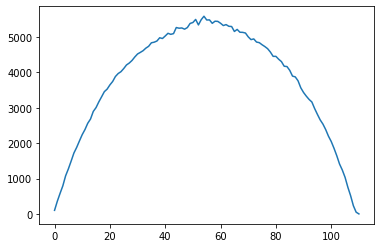

In [43]:
pairs = []
pairs_no_pos = []


for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        #print(i, end=': ')
        print_diff(ref_strands[i], noisy_strands[i])


In [44]:
for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        #print(i, end=': ')
        print_diff(ref_strands[i], noisy_strands[i])



100%|██████████| 10000/10000 [00:16<00:00, 597.39it/s]


In [31]:
import numpy as np


In [32]:
subs_no_pos, counts_no_pos = np.unique(pairs_no_pos, return_counts=True, axis=0)
sorting = np.argsort(counts_no_pos)
subs_no_pos = subs_no_pos[sorting]
counts_no_pos = counts_no_pos[sorting]

In [33]:
for sub, count in zip(subs_no_pos, counts_no_pos):
    if count > 5:
        print("{} -> {}".format(sub[0], sub[1]), count)

 -> TGTG 6
 -> GTTC 6
ATTG ->  6
AGCT ->  6
GATG ->  6
TACG ->  6
ATT -> G 6
GTA -> C 6
ATC -> G 6
TGGT ->  6
ATTA ->  6
G -> CCT 6
AA -> TC 6
 -> CTTC 6
 -> GGCCC 6
GTTA ->  6
 -> ACCC 6
GTG -> C 6
AATG ->  6
G -> CTT 6
 -> GTGG 6
AA -> TG 6
 -> CGGA 6
A -> GGGCG 6
A -> GTC 6
 -> GCTC 6
ATGG ->  6
CATA ->  6
TGAA ->  6
 -> CCGA 6
TTAA ->  6
 -> CGTC 6
ATGA ->  6
AGTG ->  6
 -> TTGG 6
T -> GCGC 6
AT -> CCC 6
 -> TTCG 6
GCTA ->  6
AT -> CGC 6
 -> CGGT 6
 -> GAGT 6
CA -> TT 6
T -> CCCCC 6
AGAG ->  6
 -> CGCCC 6
CCA -> T 6
 -> CGCG 6
AAGT ->  6
 -> CGTT 6
ACAT ->  6
AGAC ->  6
GCC ->  6
 -> TCCG 7
 -> AAGT 7
GA -> CT 7
T -> GCGG 7
 -> CCTA 7
 -> CCTT 7
GCTT ->  7
AA -> CT 7
 -> GCCT 7
GGCA ->  7
 -> GTCC 7
TCC ->  7
ACGA ->  7
 -> CTTT 7
ATAG ->  7
GGA -> C 7
T -> CCA 7
A -> CGT 7
GG -> A 7
ACTA ->  7
G -> ACC 7
T -> AGG 7
ATGC ->  7
CTGA ->  7
CCT ->  7
AAGC ->  7
GACT ->  7
TATA ->  7
 -> CCGT 7
 -> CTCT 7
TACT ->  7
GCGA ->  7
AGAT ->  7
AAT -> G 7
 -> TCGG 7
AC -> TG 7
A -> GGCC 7
 ->

In [34]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]


In [35]:
for sub, count in zip(subs, counts):
    if count > 5:
        print("{} -> {} @ {}".format(sub[0], sub[1], sub[2]), count)


TC ->  @ 52 6
C -> G @ 11 6
 -> GT @ 50 6
C -> G @ 107 6
 -> GC @ 78 6
 -> GT @ 56 6
T -> GG @ 63 6
TA ->  @ 48 6
C -> G @ 36 6
AA ->  @ 61 6
TA ->  @ 21 6
TA ->  @ 22 6
T -> A @ 27 6
C -> G @ 27 6
TC ->  @ 57 6
CG ->  @ 37 6
CG ->  @ 52 6
TA ->  @ 40 6
T -> A @ 22 6
 -> GC @ 51 6
TA ->  @ 44 6
TA ->  @ 45 6
AA ->  @ 47 6
C -> G @ 102 6
CT ->  @ 42 6
GA ->  @ 91 6
TA ->  @ 97 6
C -> A @ 9 6
AT ->  @ 82 6
AT ->  @ 81 6
GA ->  @ 42 6
 -> CC @ 88 6
C -> A @ 92 6
 -> CC @ 41 6
A -> GC @ 18 6
 -> TG @ 64 6
AT ->  @ 67 6
AT ->  @ 65 6
 -> TG @ 51 6
 -> CG @ 57 6
AT ->  @ 52 6
GA ->  @ 27 6
AT ->  @ 75 6
TA ->  @ 63 6
 -> CC @ 62 6
TA ->  @ 92 6
T -> A @ 16 6
TA ->  @ 66 6
 -> CGG @ 55 6
CT ->  @ 26 6
TA ->  @ 69 6
TA ->  @ 72 6
AT ->  @ 99 6
 -> CA @ 13 6
TA ->  @ 73 6
GA ->  @ 78 6
GA ->  @ 76 6
AA ->  @ 42 6
T -> A @ 13 6
GA ->  @ 69 6
TA ->  @ 88 6
TA ->  @ 89 6
 -> GTT @ 54 6
C -> G @ 37 6
AA ->  @ 83 6
TA ->  @ 17 6
 -> CCC @ 52 6
 -> CCC @ 54 6
C -> A @ 102 6
C -> T @ 80 6
GT ->  @ 82 

In [36]:
import matplotlib.pyplot as plt

In [37]:
strand_len = 110
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    pos_counts[int(sub[2])] += count

print(pos_counts)

[117, 243, 365, 458, 499, 533, 561, 633, 686, 654, 649, 672, 733, 708, 696, 729, 759, 745, 772, 766, 743, 790, 764, 802, 806, 814, 835, 777, 822, 821, 810, 872, 860, 789, 846, 869, 858, 921, 830, 903, 912, 904, 955, 908, 889, 918, 972, 877, 866, 993, 970, 1121, 1329, 1621, 2235, 1981, 1624, 1147, 1057, 918, 930, 918, 894, 900, 889, 855, 903, 857, 861, 871, 927, 841, 896, 855, 848, 886, 855, 858, 854, 857, 825, 821, 814, 822, 811, 799, 800, 773, 783, 798, 734, 772, 729, 735, 740, 717, 727, 697, 685, 692, 683, 662, 649, 609, 568, 588, 532, 508, 443, 281, 306]


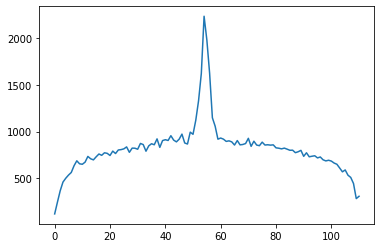

In [38]:
plt.plot(range(strand_len + 1), pos_counts)

In [39]:
def get_key(char1, char2):
    char1 = char1 if char1 != '' else '_'
    char2 = char2 if char2 != '' else '_'
    return char1 + ' -> ' + char2

strand_len = 110
pos_map = {}
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    key = get_key(sub[0], sub[1])
    if key not in pos_map:
        pos_map[key] = [0] * (strand_len + 1)
    pos_map[key][int(sub[2])] += count

print(pos_map['_ -> T'])

[15, 16, 14, 18, 33, 22, 19, 19, 25, 21, 22, 17, 35, 20, 24, 25, 22, 30, 32, 27, 22, 24, 32, 26, 20, 32, 28, 29, 28, 21, 23, 33, 29, 33, 32, 30, 18, 32, 22, 28, 32, 23, 36, 28, 30, 25, 30, 29, 26, 31, 37, 44, 52, 73, 147, 80, 53, 26, 20, 18, 38, 20, 36, 17, 26, 22, 25, 29, 24, 29, 21, 26, 33, 25, 30, 41, 20, 39, 25, 28, 26, 27, 21, 30, 30, 29, 24, 23, 23, 26, 27, 22, 33, 24, 26, 25, 21, 17, 23, 20, 19, 16, 15, 24, 24, 16, 24, 21, 15, 9, 11]


In [40]:
sub_keys = [get_key(sub[0], sub[1]) for sub in subs_no_pos]
max_10_keys = sub_keys[-10:]
max_10_counts = counts_no_pos[-10:]


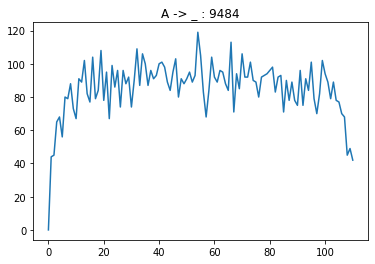

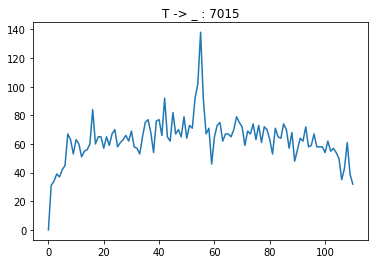

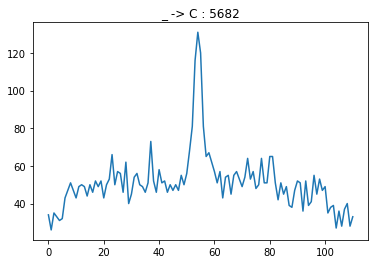

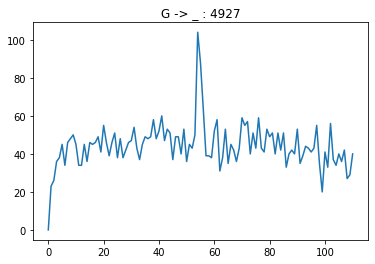

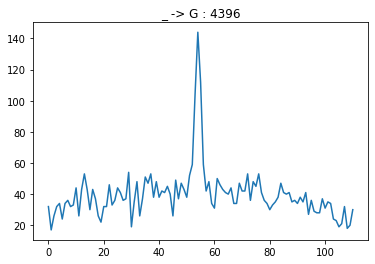

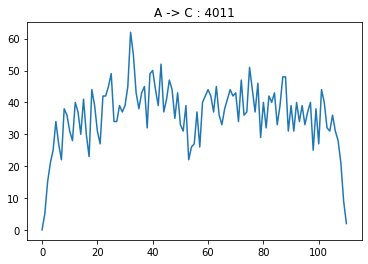

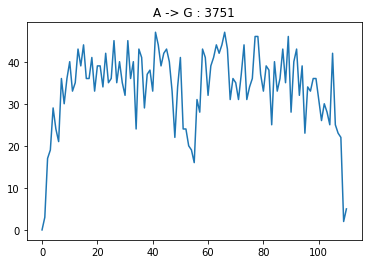

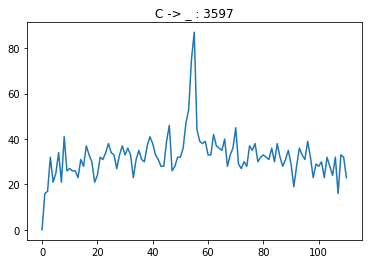

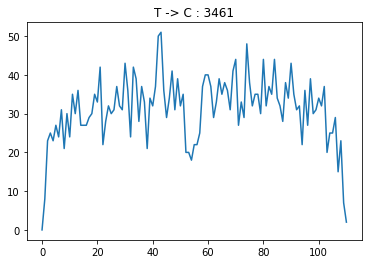

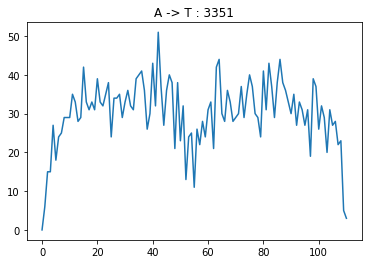

In [41]:
for key, count in zip(reversed(max_10_keys), reversed(max_10_counts)):
    plt.figure(key)
    plt.title(f'{key} : {count}')
    plt.plot(range(strand_len + 1), pos_map[key])

In [42]:
np.save('subs.npy', subs)
np.save('counts.npy', counts)